## Text Classification
### Definition
- algorithm that process text data at scale
<br>Eg : determine spam/not spam email, mark appropriate/inappropriate comments on forum
- categorization based on keywords in text

<b>Sentiment analysis:</b> a common type of text classification which identifies text content (the type of opinion it expresses)
<br>Eg: analyzing Twitter posts to determine if people like a  new movie or not

### Workflow
- <b>Step 1:</b> Gather data
- <b>Step 2:</b> Explore data -> Choose a model
- <b>Step 3:</b> Prepare data
- <b>Step 4:</b> Build, train and evaluate model
- <b>Step 5:</b> Tune Hyperparameters
- <b>Step 6:</b> Deploy model


#### Step 1: Gathering data
- important step in supervised machine learning problems
1. public API: understand the limitations of that API before using them (Eg: some APIs set a limit on rate at which you can make query)
2. make sure number of samples for every class/topic is not overly imbalanced
3. samples cover space of possible inputs, not only the common cases

#### Step 2: Explore data
Understanding the characteristics of data will enable you to build a better model: obtain high accuracy, less data for training and fewer computational resources

<b> Load the dataset </b>
- ```random.seed```: Generally, the seed value is the previous number generated by the generator. However, When the first time you use the random generator, there is no previous value. So by-default current system time is used as a seed value. <b>With the same seed, one can generate the same random value</b>
- ```random.shuffle```: used to shuffle the sequence in place

In [43]:
''' Load the IMDb movie reviews sentiment analysis dataset
# Input
    data_path: string, path to data directory
    seed: int, seed for randomizer
    
# Output
    A tuple of training and validation data
    Number of training samples: 25000
    Number of test samples: 25000
    Number of categories: 2 (0-negative, 1-positive)
'''
import os
import random 

import numpy as np
import pandas as pd

#data_path ='C:\\Users\\quynhhgoogoo\\Desktop\\learning\\'
def load_imdb_sentiment_analysis_dataset(data_path, seed=123):
    #Initialize directory path    
    imdb_data_path = os.path.join(data_path, 'aclImdb')
    
    #Load the training data
    train_texts = []
    train_labels = []
    
    for category in ['pos', 'neg']:
        train_path = os.path.join(imdb_data_path, 'train', category)
        
        for fname in sorted(os.listdir(train_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(train_path, fname), encoding='utf8') as f:
                    train_texts.append(f.read())
                train_labels.append(0 if category == 'neg' else 1)
                
    #Load the validation data
    test_texts = []
    test_labels = []
    
    for category in ['pos', 'neg']:
        test_path = os.path.join(imdb_data_path, 'test', category)
        
        for fname in sorted(os.listdir(test_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(test_path, fname),  encoding='utf8') as f:
                    test_texts.append(f.read())
                test_labels.append(0 if category == 'neg' else 1)
                
    #Shuffle the data training and label
    random.seed(seed)
    random.shuffle(train_texts)
    random.seed(seed)
    random.shuffle(train_labels)
    
    print (train_texts)
    return ((train_texts, np.array(train_labels)),
            (test_texts, np.array(test_labels)))



dataIMDb = load_imdb_sentiment_analysis_dataset("C:/Users/quynhhgoogoo/Desktop/learning", seed=123)
print(dataIMDb)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### Check the Data
- pick few samples and manually check if it is consistent with expectations
- print few random samples to see if labels correspond to review

#### Collect Key Metrics
Verify data and collect important metrics that help characterize classification's problems
1. <b>Number of samples</b>: number of examples in data
2. <b>Number of classes</b>: topics categorized in data
3. <b>Number of sample per class</b>: In balanced datasets, all classes should have a similiar number of samples.
4. <b>Number of words per sample</b>: Median number of words in one sample
5. <b>Frequency distribution of words</b>: Frequency of each word in datasets
6. <b>Distribution of sample length</b>: Words per sample in datasets

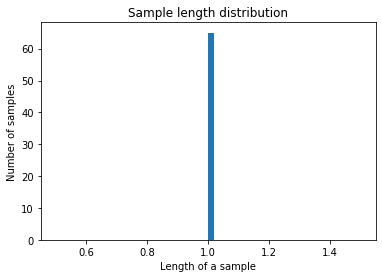

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def get_num_words_per_sample(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()
    
get_num_words_per_sample("Time wasting")
plot_sample_length_distribution("Time wasting. Dont know why I have to see it. The worst film ever")